<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

### <span class="burk">Комментарий для ментора</span>.
<span style="color:blue"> Некоторые вопросы решены несколькими способами. Это сделано, для того чтобы проект использовать как шпаргалку к другим проектам. Эти способы могут быть не оптимальными для решения конкретного вопроса, но могут быть полезны в последствии. Оптимальный способ находится в последних ячейках вопроса и определен комментарием __Решение для проекта__  
Если эти дополнительные решения мешают(не важны, не интересны) можно их пропустить; но, просьба , их просмотреть по 'диагонали' и указать на очевидные недочеты, спасибо</span>.

# <center> Проект: Анализ резюме из HeadHunter
   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# количество строк в таблице было не больше 5
#pd.set_option('display.max_rows', 5)
# текст в ячейке отражался полностью вне зависимости от длины (None)
pd.set_option('display.max_colwidth', 70)
# все числа отражались с двумя знаками после запятой;
#pd.set_option('display.float_format', '{:.2f}'.format)
# Сбросить настройки
# pd.reset_option('display')

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [3]:
df = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [4]:
display(df.head(2))

Пол, возраст          ЗП  \
0  Мужчина ,  39 лет , родился 27 ноября 1979  29000 руб.   
1   Мужчина ,  60 лет , родился 20 марта 1959  40000 руб.   

  Ищет работу на должность:  \
0   Системный администратор   
1      Технический писатель   

                                            Город, переезд, командировки  \
0  Советск (Калининградская область) , не готов к переезду , не готов...   
1           Королев , не готов к переезду , готов к редким командировкам   

                                                 Занятость  \
0  частичная занятость, проектная работа, полная занятость   
1  частичная занятость, проектная работа, полная занятость   

                                                                  График  \
0  гибкий график, полный день, сменный график, вахтовый метод, удален...   
1           гибкий график, полный день, сменный график, удаленная работа   

                                                             Опыт работы  \
0  Опыт работы 16 лет 10 месяцев  Август 2010 — по настоящее время 8 ...   
1  Опыт работы 19 лет 5 месяцев  Январь 2000 — по настоящее время 19 ...   

  Последнее/нынешнее место работы  \
0         МАОУ "СОШ № 1 г.Немана"   
1    Временный трудовой коллектив   

                       Последняя/нынешняя должность  \
0                           Системный администратор   
1  Менеджер проекта, Аналитик, Технический писатель   

                                                       Образование и ВУЗ  \
0  Неоконченное высшее образование 2000  Балтийская государственная а...   
1  Высшее образование 1981  Военно-космическая академия им. А.Ф. Можа...   

  Обновление резюме                            Авто  
0  16.04.2019 15:59  Имеется собственный автомобиль  
1  12.04.2019 08:42                      Не указано

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+



 ##### <span class="mark">Коментарий</span>.
<span style="color:blue">Столбцы с пропусками ```['Последнее/нынешнее место работы', 'Опыт работы', 'Последняя/нынешняя должность']``` </span>.


5. Выведите основную статистическую информацию о столбцах.


In [6]:
df.describe()

Пол, возраст          ЗП  \
count                                           44744       44744   
unique                                          16003         690   
top     Мужчина ,  32 года , родился 17 сентября 1986  50000 руб.   
freq                                               18        4064   

       Ищет работу на должность:  \
count                      44744   
unique                     14929   
top      Системный администратор   
freq                        3099   

                                   Город, переезд, командировки  \
count                                                     44744   
unique                                                    10063   
top     Москва , не готов к переезду , не готов к командировкам   
freq                                                       1261   

               Занятость       График  \
count              44744        44744   
unique                38           47   
top     полная занятость  полный день   
freq               30026        22727   

                                                                  Опыт работы  \
count                                                                   44576   
unique                                                                  44413   
top     Опыт работы 10 лет 8 месяцев  Апрель 2018 — по настоящее время 1 г...   
freq                                                                        3   

                                        Последнее/нынешнее место работы  \
count                                                             44743   
unique                                                            30214   
top     Индивидуальное предпринимательство / частная практика / фриланс   
freq                                                                935   

       Последняя/нынешняя должность  \
count                         44742   
unique                        16927   
top         Системный администратор   
freq                           2062   

                                                            Образование и ВУЗ  \
count                                                                   44744   
unique                                                                  40148   
top     Высшее образование 1987 Военный инженерный Краснознаменный институ...   
freq                                                                        4   

       Обновление резюме        Авто  
count              44744       44744  
unique             18838           2  
top     07.05.2019 09:50  Не указано  
freq                  25       32268

# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [7]:
# Формирование новых столбцов из одного. 1-й способ
# функция конвертации строки в словарь
def convert_to_dict(str_n):
    list_n = str_n.split()
    dictionary = {}
    for i, word in enumerate(list_n):
        if len(word) == 4 and (word[:2] == '19' or word[:2] == '20'):  # поиск года
            dictionary['Образование'] = ' '.join(list_n[:i])
            dictionary['Год окончания обучения'] = int(list_n[i])
            dictionary['ВУЗ'] = ' '.join(list_n[i+1:])
            break
    return dictionary

df_educ = df['Образование и ВУЗ'].apply(convert_to_dict)  # Преобразование строк в словарь
df_educ.apply(pd.Series)  # Формирование новых признаков из словаря(построчный?)
df_educ = pd.json_normalize(df_educ) # БЫСТРЫЙ способ словарь в столбцы(векторный?)
display(df_educ.head(2))


Образование  Год окончания обучения  \
0  Неоконченное высшее образование                    2000   
1               Высшее образование                    1981   

                                                                     ВУЗ  
0  Балтийская государственная академия рыбопромыслового флота, Калини...  
1  Военно-космическая академия им. А.Ф. Можайского, Санкт-Петербург А...

In [8]:
#Формирование новых столбцов из одного. 2-й способ
#функция конвертации строки в сроку с маркерами-разделителями
def convert_to_str(str_n):
    list_n =str_n.split()
    for i, word in enumerate(list_n):
        if len(word)==4 and (word[:2]=='19' or word[:2]=='20'):
            str_new = ' '.join(list_n[0:i]) + '\n' + word + '\n' + ' '.join(list_n[i+1:])
            break
    return str_new
df_educ = df['Образование и ВУЗ'].apply(convert_to_str).str.split('\n',expand=True) #Формирование новых признаков из строки с разделителями
df_educ.columns = ['Образование', 'Год окончания обучения', 'ВУЗ'] #удобные имена столбцов
display(df_educ['Образование'].value_counts()) #Просмотр значений
display(df_educ['Год окончания обучения'].value_counts()) #Просмотр значений
display(df_educ[df_educ['Год окончания обучения'] == '2028']) #дальнейшее исследование

Высшее образование                    29088
Среднее специальное образование        5765
Неоконченное высшее образование        4557
Высшее образование (Бакалавр)          2633
Высшее образование (Магистр)           1812
Среднее образование                     559
Высшее образование (Кандидат наук)      323
Высшее образование (Доктор наук)          7
Name: Образование, dtype: int64

2015    3004
2013    2756
2014    2705
2012    2674
2011    2654
        ... 
2028       3
2029       2
1954       1
1969       1
1972       1
Name: Год окончания обучения, Length: 62, dtype: int64

Образование Год окончания обучения  \
8589   Неоконченное высшее образование                   2028   
9846                Высшее образование                   2028   
21213  Неоконченное высшее образование                   2028   

                                                                         ВУЗ  
8589   горьковский полетехнический институт конструирование и производств...  
9846   Московский государственный институт международных отношений Минист...  
21213                 Поступлю как-нибудь потом Колледж, Программист от Бога

###### <span class="mark">Коментарий.</span> 
   <span style="color:blue">Интерсный признак 'Год окончания обучения', который может скорректировать признак 'Образование', особенно в связке с годом рождения...  
    Возможно признак 'Образование' нужно расширить , сделать больше трех категорий...   
    Но условия проекта другие...</span>.

__<span class="mark">Решение для проекта</span>__

In [9]:
# Функция поиска по ключевым словам-категория
def education(str_i):
    list_i = str_i.split()
    if list_i[0] == 'Высшее':
        return 'высшее'
    elif list_i[0] == 'Неоконченное':
        return 'неоконченное высшее'
    else:
        if list_i[1] == 'специальное':
            return 'среднее специальное'
        else:
            return 'среднее'
    
df['Образование'] = df['Образование и ВУЗ'].apply(education)
df = df.drop('Образование и ВУЗ', axis=1)
display(df['Образование'].value_counts())

высшее                 33863
среднее специальное     5765
неоконченное высшее     4557
среднее                  559
Name: Образование, dtype: int64

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [10]:
# Решение для сохранения всей информации из столбца ['Пол, возраст']
# Разбитие на несколько столбцов
df_sex = df['Пол, возраст'].str.split(expand=True)
display(df_sex.head(2))
#Функция преобразования названия месяца  в строковый эквивалент числа
def months(month):
    if month[:3] == 'янв':
        return '1'
    elif month[:3] == 'фев':
        return '2'
    elif month[:3] == 'мар':
        return '3'
    elif month[:3] == 'апр':
        return '4'
    elif month[:2] == 'ма':
        return '5'
    elif month[:3] == 'июн':
        return '6'
    elif month[:3] == 'июл':
        return '7'
    elif month[:3] == 'авг':
        return '8'
    elif month[:3] == 'сен':
        return '9'
    elif month[:3] == 'окт':
        return '10'
    elif month[:3] == 'ноя':
        return '11'
    elif month[:3] == 'дек':
        return '12'
df_sex[7] = df_sex[7].apply(months)# Применение функции преобразования месяца
# объединить столбцы с помощью разделителя
df_sex[6] = df_sex[6].str.cat(df_sex[[7, 8]], sep='.')
#Преобразование в формат даты для столбца дата рождения
df_sex[6] = pd.to_datetime(df_sex[6], dayfirst=True)
df_sex = df_sex[[0, 2, 6]] # Удаление лишних столбцов
df_sex.columns = ['Пол', 'Кол-во лет', 'Дата рождения']
df_sex.head(2)

0  1   2    3  4        5   6       7     8
0  Мужчина  ,  39  лет  ,  родился  27  ноября  1979
1  Мужчина  ,  60  лет  ,  родился  20   марта  1959

Пол Кол-во лет Дата рождения
0  Мужчина         39    1979-11-27
1  Мужчина         60    1959-03-20

###### Коментарий. 
   <span style="color:blue">Возможно более корректна информация из столбца 'Дата рождения'</span>.

__Решение для проекта__

In [11]:
df_sex = df['Пол, возраст'].str.split(n=3, expand=True) # Формирование новых столбцов
display(df_sex.head(2))
# Формирование новых признаков
df['Пол'] = df_sex[0].apply(lambda x: 'М' if x=='Мужчина' else 'Ж')
df['Возраст'] = df_sex[2].astype('int16')
df = df.drop('Пол, возраст', axis=1) # Удаление столбца
# Формирование ответов из задания
display(df['Пол'].value_counts(normalize=True)*100)
display(df['Возраст'].mean())

0  1   2                             3
0  Мужчина  ,  39  лет , родился 27 ноября 1979
1  Мужчина  ,  60   лет , родился 20 марта 1959

М    80.929287
Ж    19.070713
Name: Пол, dtype: float64

32.19674146254246

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


__<span class="mark">Решение для проекта</span>__

In [12]:
#функция конвертации опыта работы в месяцы
def job(str_i):
    dict_job ={'year':0 , 'month':0}
    if str_i is np.nan or str_i=='Не указано': #Заполнение не очевидных пропусков
        return np.nan
    #print(str_i)
    list_i = str_i.split()[:6]
    for index, value in enumerate(list_i):
        if value in ['год', 'года', 'лет']:
            dict_job['year'] = int(list_i[index-1])
        elif value in ['месяц', 'месяца', 'месяцев']:
            dict_job['month'] = int(list_i[index-1])
    job_i = dict_job['year']*12 + dict_job['month']
    return job_i
# формирование признака опыт работы в месяцах  
df['Опыт работы (месяц)'] = df['Опыт работы'].apply(job)
df = df.drop('Опыт работы', axis=1)
print(round(df['Опыт работы (месяц)'].median()))
        

100


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


__<span class="mark">Решение для проекта</span>__

In [13]:
# Функция определения города
def city(str_i):
    million_cities = [
        'Новосибирск', 'Екатеринбург', 'Нижний Новгород',
        'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону',
        'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград' 
    ]
    list_i = str_i.replace(' , ', ',').split(',')
    if list_i[0] in million_cities: 
        return 'город-миллионник'
    elif list_i[0]=='Москва':
        return list_i[0]
    elif list_i[0]=='Санкт-Петербург':
        return list_i[0]
    else:
        return 'другие'
# Функция определения к готовности к командировкам
def business_trips(str_i):
    list_i = str_i.replace(' , ', ',').split(',')
    for i in list_i[-1].split():
        if i == 'командировкам':
            for i in list_i[-1].split():
                if i == 'не':
                    return False
            return True           
    return False # Если информация отсутствует в df
# Функция определения готовности к переезду
def ready_to_move(str_i):
    ready_to_move_lst = ['не готова к переезду', 'не готов к переезду']
    for i in ready_to_move_lst:
        if i in str_i:
            return False
    return True
# формирование признаков
df['Город'] = df['Город, переезд, командировки'].apply(city)
df['Готовность к переезду'] = df['Город, переезд, командировки'].apply(business_trips)
df['Готовность к командировкам'] = df['Город, переезд, командировки'].apply(ready_to_move)
df = df.drop('Город, переезд, командировки', axis=1)


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>

Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [14]:
#Фрагмент кода для определения уникальных значений
s = set()
for i in df["Занятость"]:
    list_i = i.split(', ')
    for element in list_i:
        s.add(element)
print(s)

{'полная занятость', 'волонтерство', 'стажировка', 'проектная работа', 'частичная занятость'}


In [15]:
# 1-способ через словарь на примере Занятость
# Функция для формирования словаря из строки
def busyness(str_i):
    busyness_dict = {
        'волонтерство':False, 
        'проектная работа':False,
        'частичная занятость':False, 
        'стажировка':False, 
        'полная занятость':False}
    list_i = str_i.split(', ')
    for element in list_i:
        if element in busyness_dict:
            busyness_dict[element] = True
    return busyness_dict

# БЫСТРЫЙ способ словарь в столбцы(векторный?)
pd.json_normalize(df['Занятость'].apply(busyness)).head(2)

волонтерство  проектная работа  частичная занятость  стажировка  \
0         False              True                 True       False   
1         False              True                 True       False   

   полная занятость  
0              True  
1              True

In [16]:
# 2-ой способ через str.contains (если есть True , отсутствует False)
df['волонтерство'] = df['Занятость'].str.contains('волонтерство')
df['полная занятость'] = df['Занятость'].str.contains('полная занятость')
df['частичная занятость'] = df['Занятость'].str.contains('частичная занятость')
df['проектная работа'] = df['Занятость'].str.contains('проектная работа')
df['стажировка'] = df['Занятость'].str.contains('стажировка')

df['сменный график'] = df['График'].str.contains('сменный график')
df['полный день'] = df['График'].str.contains('полный день')
df['вахтовый метод'] = df['График'].str.contains('вахтовый метод')
df['удаленная работа'] = df['График'].str.contains('удаленная работа')
df['гибкий график'] = df['График'].str.contains('гибкий график')

__<span class="mark">Решение для проекта</span>__

In [17]:
#3-й способ подсмотрено в конспекте лекций
employments = ['полная занятость', 'частичная занятость',
              'проектная работа', 'волонтерство', 'стажировка']
charts = ['полный день', 'сменный график', 
         'гибкий график', 'удаленная работа',
         'вахтовый метод']
for employment, chart in zip(employments, charts):
    df[employment] = df['Занятость'].apply(lambda x: employment in x)
    df[chart] = df['График'].apply(lambda x: chart in x)
df = df.drop('Занятость', axis=1)
df = df.drop('График', axis=1)

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


__<span class="mark">Решение для проекта</span>__

In [18]:
# Формирование новой таблицы из строки
df_wage = df['ЗП'].str.replace('.','', regex=True).str.split(expand=True)
df_wage.columns = ['ЗП', 'валюта'] # Красивые имена колонок
df_wage['ЗП'] = df_wage['ЗП'].astype('float32') # в числовой формат
# Словарь соответствия наименований валют
values_money = {'грн': 'UAH',
  'USD': 'USD',
  'EUR': 'EUR',
  'белруб': 'BYN',
  'KGS': 'KGS',
  'сум': 'UZS',
  'AZN': 'AZN',
  'KZT': 'KZT',
  'руб': 'RUB'}
df_wage['валюта'] = df_wage['валюта'].replace(values_money) # изменение наименования валюты 
display(df_wage.head(2))
df_wage = pd.concat([df_wage, df['Обновление резюме']], axis=1) # Объединение в лоб
df_wage['Обновление резюме'] = pd.to_datetime(df_wage['Обновление резюме']).dt.date # из формата DT - дата
display(df_wage.head(2))

ЗП валюта
0  29000.0    RUB
1  40000.0    RUB

ЗП валюта Обновление резюме
0  29000.0    RUB        2019-04-16
1  40000.0    RUB        2019-12-04

In [19]:
# чтения таблицы курсов валют
df_money = pd.read_csv('data/ExchangeRates.csv')
df_money = df_money.drop(['per', 'time', 'vol'], axis=1) # удаление лишних столбцов
df_money.columns = ['валюта', 'дата курса', 'курс', 'пропорция'] # красивые имена столбцов
df_money['дата курса'] = pd.to_datetime(df_money['дата курса'], dayfirst=True).dt.date #из формата DT - дата
display(df_money.head(2))

валюта  дата курса     курс  пропорция
0    USD  2017-12-29  57.6291          1
1    USD  2017-12-30  57.6002          1

In [20]:
# Объединение таблиц по ДВУМ столбцам
df_wage = df_wage.merge(
    right=df_money, 
    how='left',
    left_on=['Обновление резюме', 'валюта'],
    right_on=['дата курса', 'валюта'])

df_wage['курс'] = df_wage['курс'].fillna(1) # заполнение пропусков 1
df_wage['пропорция'] = df_wage['пропорция'].fillna(1) # заполнение пропусков 1
df['ЗП (руб)'] = df_wage['ЗП'] *df_wage['курс']/df_wage['пропорция']
df = df.drop(['ЗП'], axis=1)


In [21]:
df_wage

ЗП валюта Обновление резюме дата курса  курс  пропорция
0       29000.0    RUB        2019-04-16        NaN   1.0        1.0
1       40000.0    RUB        2019-12-04        NaN   1.0        1.0
2       20000.0    RUB        2019-04-16        NaN   1.0        1.0
3      100000.0    RUB        2019-08-04        NaN   1.0        1.0
4      140000.0    RUB        2019-04-22        NaN   1.0        1.0
...         ...    ...               ...        ...   ...        ...
44739   50000.0    RUB        2019-04-22        NaN   1.0        1.0
44740   39000.0    RUB        2019-04-22        NaN   1.0        1.0
44741   40000.0    RUB        2019-09-04        NaN   1.0        1.0
44742   20000.0    RUB        2019-04-26        NaN   1.0        1.0
44743  120000.0    RUB        2018-05-07        NaN   1.0        1.0

[44744 rows x 6 columns]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ищет работу на должность:        44744 non-null  object 
 1   Последнее/нынешнее место работы  44743 non-null  object 
 2   Последняя/нынешняя должность     44742 non-null  object 
 3   Обновление резюме                44744 non-null  object 
 4   Авто                             44744 non-null  object 
 5   Образование                      44744 non-null  object 
 6   Пол                              44744 non-null  object 
 7   Возраст                          44744 non-null  int16  
 8   Опыт работы (месяц)              44574 non-null  float64
 9   Город                            44744 non-null  object 
 10  Готовность к переезду            44744 non-null  bool   
 11  Готовность к командировкам       44744 non-null  bool   
 12  волонтерство      

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

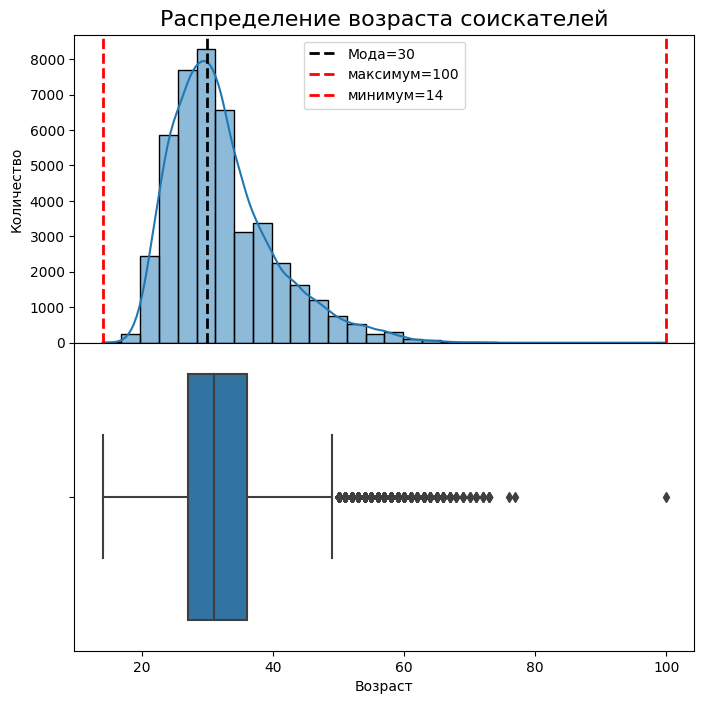

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))
plt.subplots_adjust(hspace=.0)
gis_1 = sns.histplot(
    data=df,
    x=df['Возраст'],
    bins=30,
    kde=True,
    ax=axes[0]
)
gis_2 = sns.boxplot(
    data=df,
    x=df['Возраст'],     
    ax=axes[1]
)
gis_1.set_title('Распределение возраста соискателей', fontsize=16)
mod = df['Возраст'].mode()[0]
max_o = df['Возраст'].max()
min_o = df['Возраст'].min()
gis_1.axvline(mod, color='k', lw=2, label=f'Мода={mod}', linestyle='dashed')
gis_1.axvline(max_o, color='r', lw=2, label=f'максимум={max_o}', linestyle='dashed')
gis_1.axvline(min_o, color='r', lw=2, label=f'минимум={min_o}', linestyle='dashed')
gis_1.legend();
gis_1.set_ylabel('Количество');

In [24]:
import plotly.express as px
fig = px.histogram(
    data_frame=df,
    x='Возраст',
    title='Распределение возраста соискателей',
    #histnorm='percent', # в процентах
    nbins=30,
    width=1000,
    height=800,
    marginal='box',
)
fig.update_layout(
    title_text='Распределение возраста соискателей', # title of plot
    xaxis_title_text='Возраст', # xaxis label
    yaxis_title_text='Количество в процентах', # yaxis label
    bargap=0.001, # gap between bars of adjacent location coordinates
    bargroupgap=0.001 # gap between bars of the same location coordinates
)
fig.show()

Мода распределения равна 30 лет. Возраст соискателей от 14 до 100 лет. Основной интервал от 27 до 36 лет. Возраст от 70 до 100 лет возможно выбросы.

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

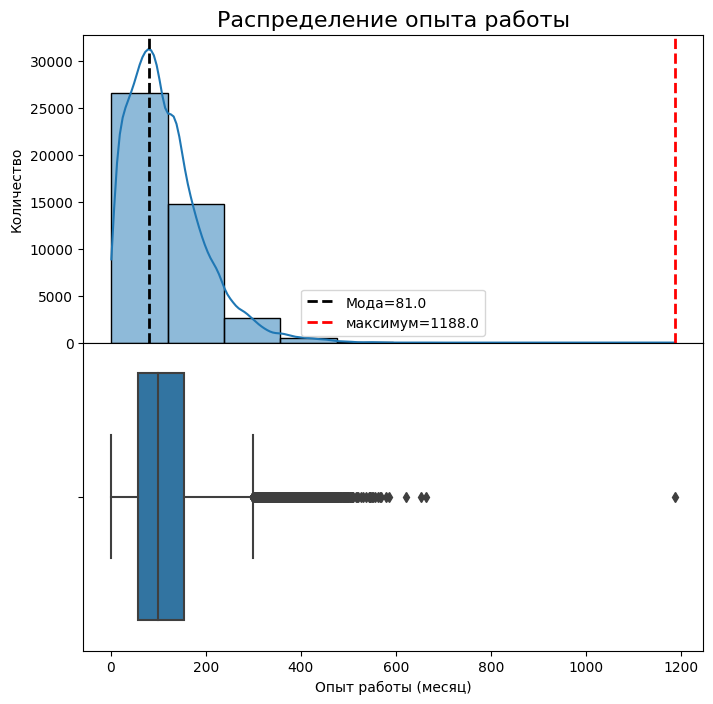

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))
plt.subplots_adjust(hspace=.0)
gis_1 = sns.histplot(
    data=df,
    x=df['Опыт работы (месяц)'],
    bins=10,
    kde=True,
    ax=axes[0]
)
gis_2 = sns.boxplot(
    data=df,
    x=df['Опыт работы (месяц)'],     
    ax=axes[1]
)
gis_1.set_title('Распределение опыта работы', fontsize=16)
mod = df['Опыт работы (месяц)'].mode()[0]
max_o = df['Опыт работы (месяц)'].max()
gis_1.axvline(mod, color='k', lw=2, label=f'Мода={mod}', linestyle='dashed')
gis_1.axvline(max_o, color='r', lw=2, label=f'максимум={max_o}', linestyle='dashed')
gis_1.legend();
gis_1.set_ylabel('Количество');

#gis_2.set_title('Распределение опыта работы в месяцах', fontsize=16);

In [26]:
fig = px.histogram(
    data_frame=df,
    x='Опыт работы (месяц)',
    #title='Распределение опыта работы(месяц)',
    histnorm='percent', # в процентах
    nbins=20,
    width=1000,
    height=600,
    marginal='box',
)
fig.update_layout(
    title_text='Распределение опыта работы(месяц)', # title of plot
    xaxis_title_text='Опыт работы(месяц)', # xaxis label
    yaxis_title_text='Количество в процентах', # yaxis label
    bargap=0.001, # gap between bars of adjacent location coordinates
    bargroupgap=0.001 # gap between bars of the same location coordinates
)
fig.show()

Мода распределения распределения равна 81 месяц(6,75 лет). Максимум 93 года. Основной интервал от 54 до 154 месяцев. Возможные выбросы от 622 месяцев, что коррелирует с признаком возраст

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


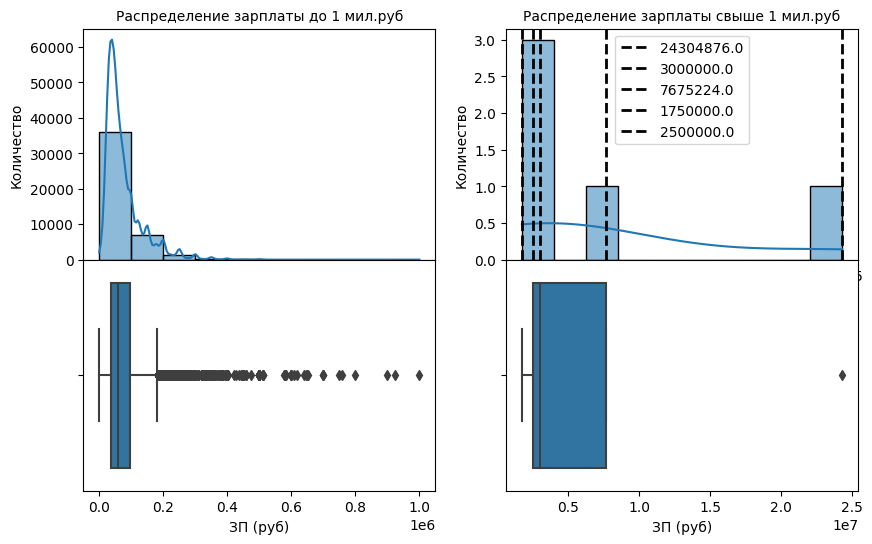

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
plt.subplots_adjust(hspace=.0)
gis_1 = sns.histplot(
    data=df,
    x=df[df['ЗП (руб)']<=1000000]['ЗП (руб)'],
    bins=10,
    kde=True,
    ax=axes[0, 0]
)
gis_2 = sns.boxplot(
    data=df,
    x=df['ЗП (руб)'][df['ЗП (руб)']<=1000000],     
    ax=axes[1, 0]
)
gis_3 = sns.histplot(
    data=df,
    x=df[df['ЗП (руб)']>1000000]['ЗП (руб)'],
    bins=10,
    kde=True,
    ax=axes[0, 1]
)
gis_4 = sns.boxplot(
    data=df,
    x=df[df['ЗП (руб)']>1000000]['ЗП (руб)'],     
    ax=axes[1, 1]
)
gis_1.set_title('Распределение зарплаты до 1 мил.руб', fontsize=10)
gis_1.set_ylabel('Количество');

gis_3.set_title('Распределение зарплаты свыше 1 мил.руб', fontsize=10)
gis_3.set_ylabel('Количество');
x=df[df['ЗП (руб)']>1000000]['ЗП (руб)']
for i in x:
    gis_3.axvline(i, color='k', lw=2, label=f'{i}', linestyle='dashed')
gis_3.legend();

In [28]:

fig = px.histogram(
    data_frame=df[df['ЗП (руб)']<=1000000],
    x='ЗП (руб)',
    #title='Распределение опыта работы(месяц)',
    histnorm='percent', # в процентах
    nbins=40,
    width=1000,
    height=400,
    marginal='box',
)
fig.update_layout(
    title_text='Распределение ЗП', # title of plot
    xaxis_title_text='ЗП', # xaxis label
    yaxis_title_text='Количество в процентах', # yaxis label
    bargap=0.001, # gap between bars of adjacent location coordinates
    bargroupgap=0.001 # gap between bars of the same location coordinates
)
fig.show()

In [29]:
print(df['ЗП (руб)'].mode()[0])
print(df[df['ЗП (руб)']<=1000000]['ЗП (руб)'].mode()[0])

50000.0
50000.0


График распределения с учетом максимальных зарплат более 1 мил. рублей не информативен. Было построена два распределения. Мода распределения 50000 руб. Интервал от 37 до 95 тыс. руб. Аномалии зарплаты свыше 1 мил.руб.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

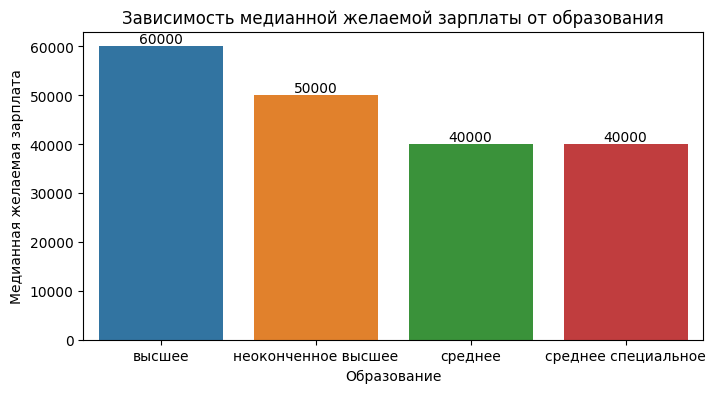

In [30]:
fig, axes = plt.subplots(figsize=(8, 4))
gr = df[df['ЗП (руб)']<1e6].groupby('Образование')[['ЗП (руб)']].median()
barplot = sns.barplot(
    data=gr,
    x=gr.index,
    y='ЗП (руб)'
    #hue=gr.index,
)
barplot.set_ylabel('Медианная желаемая зарплата');
barplot.set_title('Зависимость медианной желаемой зарплаты от образования');
for container in barplot.containers : 
 barplot.bar_label (container)

In [31]:
gr = df[df['ЗП (руб)']<1e6].groupby('Образование')[['ЗП (руб)']].median()
fig = px.bar(
    data_frame=gr,
    x=gr.index,
    y='ЗП (руб)',
    title='Медианная з/п по уровню образования',
    width=800,
    height=400,
)
fig.update_layout(
    yaxis_title_text='Медианная желаемая зарплата', # yaxis label
    bargap=0.5,
    bargroupgap=0.5
    )
fig.show()

Наибольшая медианная зарплата у соискателей с высшим образованием - 60 тыс.руб. Среднее и среднеспециальное имеет одинаковый наименьший уровень медианной зарплаты и равен 40 тыс.руб. Уровень образования сильно влияет на уровень желаемой з/п.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

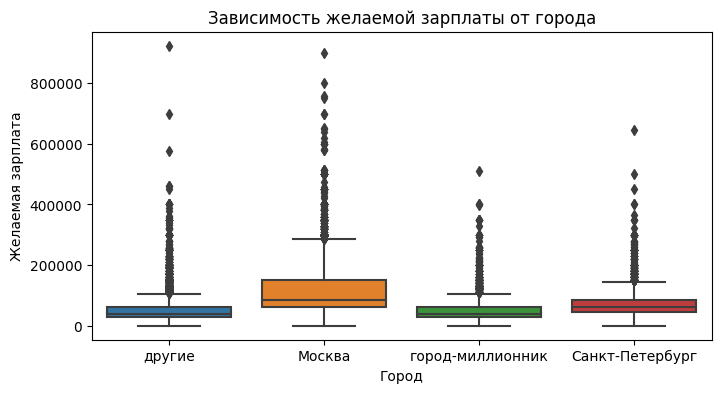

In [32]:
fig, axes = plt.subplots(figsize=(8, 4))
#gr = df[df['ЗП (руб)']<1e6].groupby('Город')[['ЗП (руб)']].max()
barplot = sns.boxplot(
    data=df[df['ЗП (руб)']<1e6],
    x='Город',
    y='ЗП (руб)'
    #hue=gr.index,
)
barplot.set_ylabel('Желаемая зарплата');
barplot.set_title('Зависимость желаемой зарплаты от города');


In [33]:
fig = px.box(
    data_frame=df[df['ЗП (руб)']<1e6],
    x='Город',
    y='ЗП (руб)',
    color='Город',
    title='Распределение з/п по городам',
    width=800,
    height=400,
)
fig.show()

Город-лидер по уровню зарплат - Москва, затем Питер. А города-миллионники и другие не отличаются. Возможно необходимо города отличные от Москвы и Питера разделить по другому признаку, например- областные центры. Признак важен. 

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

In [34]:
gr = df.groupby(by=['Готовность к переезду', 'Готовность к командировкам'], as_index=False)['ЗП (руб)'].median()
gr

Готовность к переезду  Готовность к командировкам  ЗП (руб)
0                  False                       False  40000.00
1                  False                        True  50000.00
2                   True                       False  60000.00
3                   True                        True  65924.25

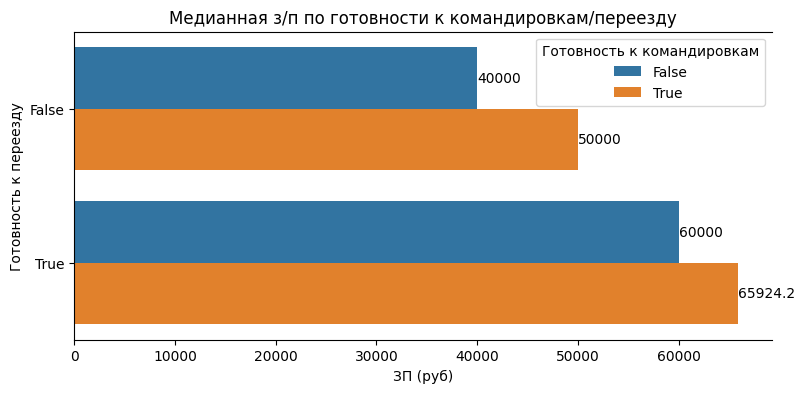

In [35]:
fig, axes = plt.subplots(figsize=(9, 4))

barplot = sns.barplot(
    data=df,
    y='Готовность к переезду',
    x= 'ЗП (руб)',
    hue='Готовность к командировкам',
    estimator= "median",
    orient='h',
    errorbar=None,    
)
axes.spines['right'].set_visible(False) #Убираем правую границу
barplot.set_title('Медианная з/п по готовности к командировкам/переезду')
for container in barplot.containers: 
    barplot.bar_label (container)

In [36]:

fig = px.bar(
    data_frame=gr,
    y='Готовность к переезду',
    x='ЗП (руб)',
    barmode="group",
    color='Готовность к командировкам',
    orientation='h',
    title='Медианная з/п по готовности к командировкам/переезду',
    width=800,
    height=400,
)
fig.show()

Готовность соискателей к лишениям(выход из зонны комфорта) в виде командировок и переезда должна, по их мнению, выше оплачиваться, что логично и подтверждается житейским опытом.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

In [37]:
piv = df.pivot_table(
    columns='Возраст',
    index ='Образование', 
    values='ЗП (руб)',
    aggfunc='median',
    fill_value=0,
    sort=True)
piv

Возраст                14     15         16       17     18     19     20   \
Образование                                                                  
высшее               60000      0  122582.49  90075.5  30000  30000  30000   
неоконченное высшее      0      0       0.00  80000.0  25000  30000  31000   
среднее                  0  10000       0.00  44000.0  35000  45000  29000   
среднее специальное      0   2000   30000.00  25000.0  25151  30000  30000   

Возраст                21     22     23   ...     67     68      69     70   \
Образование                               ...                                 
высшее               35000  40000  45000  ...   70000  79000  112500  80000   
неоконченное высшее  35000  40000  40000  ...       0      0       0      0   
среднее              40000  40000  35000  ...       0      0       0      0   
среднее специальное  30000  30000  35000  ...  120000      0       0      0   

Возраст                71     72     73     76     77     100  
Образование                                                    
высшее               75000  75000  62500  45000  90000      0  
неоконченное высшее      0      0      0      0      0      0  
среднее                  0      0      0      0      0      0  
среднее специальное      0      0      0      0      0  60000  

[4 rows x 63 columns]

Text(0.5, 1.0, 'Медианная з/п по образованию и возрасту')

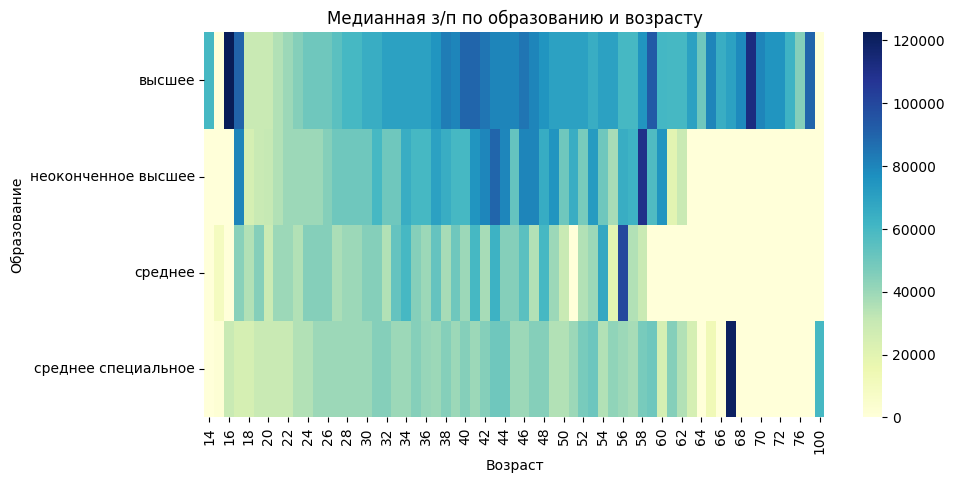

In [38]:
fig, axes = plt.subplots(figsize=(10, 5))
heatmap = sns.heatmap(data=piv, cmap='YlGnBu')
heatmap.set_title('Медианная з/п по образованию и возрасту')

In [39]:
fig = px.imshow(
    piv,
    aspect='auto',
    color_continuous_scale='greens',
    title='Медианная з/п по образованию и возрасту',
    width=1000,
    height=600,
)
fig.show()

В двух группах высшее и незаконченное высшее с возрастом(т.е. с опытом) з/п растет примерно до 45 лет и далее остается примерно на одном уровне. Примечательно что в трех группах(кроме высшего) с наступление пенсионного возраста потребность в поиске работы отсутствует(в группе средннее специальное есть некоторые выбросы).
В 2 группах без высшего образования з/п практически не зависит от возраста.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

In [40]:
s_trial = df['Опыт работы (месяц)']/12

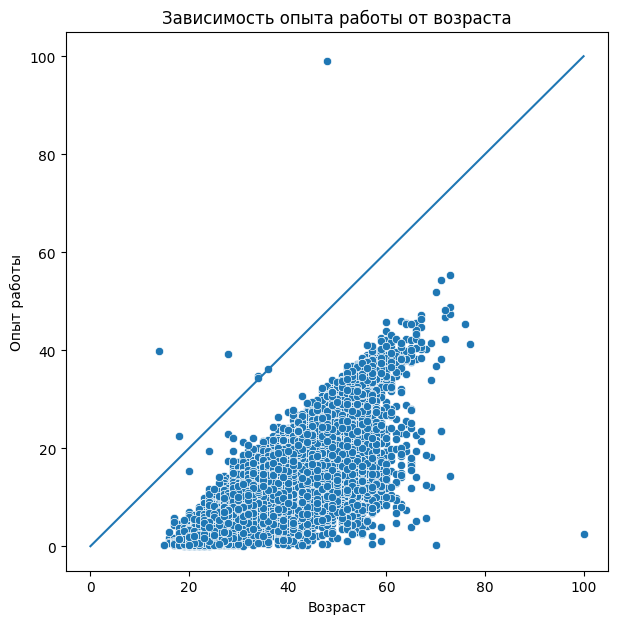

In [41]:
fig, axes = plt.subplots(figsize=(7, 7))
sns.lineplot(x=(0, 100), y=(0, 100))
scatterplot= sns.scatterplot(
    data=df, 
    y=s_trial, 
    x='Возраст',
)
scatterplot.set_title('Зависимость опыта работы от возраста');
scatterplot.set_ylabel('Опыт работы');

In [42]:
df[s_trial > df['Возраст']].shape[0]

7

Согласно построенному графику есть точно 7 выбросов. Так же видно что основная масса соискателей имеет опыт работы обличающейся примерно на 18 лет от возраста. Что логично, основная масса людей идет работать после школы. Также есть некоторые точки которые находятся близко к средней линии - это тоже возможно выбросы.

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


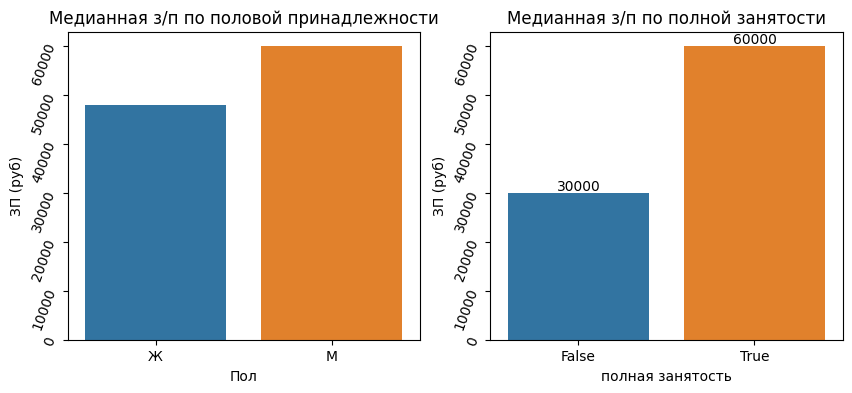

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
gr1 = df[df['ЗП (руб)']<1e6].groupby('Пол', as_index=False)[['ЗП (руб)']].median()
barplot1 = sns.barplot(
    data=gr1,
    x='Пол',
    y='ЗП (руб)',
    ax=axes[0]
)
gr2 = df[df['ЗП (руб)']<1e6].groupby('полная занятость', as_index=False)[['ЗП (руб)']].median()
barplot2 = sns.barplot(
    data=gr2,
    x='полная занятость',
    y='ЗП (руб)',
    ax=axes[1]
)
barplot1.tick_params(axis='y', rotation=70);
barplot2.tick_params(axis='y', rotation=70);
barplot1.set_title('Медианная з/п по половой принадлежности', fontsize=12);
barplot2.set_title('Медианная з/п по полной занятости', fontsize=12);
for container in barplot2.containers : 
    barplot2.bar_label (container)

Первая таблица показывает, что мужчины хотят получать в среднем больше, чем женщины.
Вторая-подтверждает очевидный факт, что полная занятость подразумевает более высокую з/п. Примечателен факт, что ровно в 2 раза.

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [44]:
display(df[df.duplicated()].shape)
df = df.drop_duplicates()

(158, 23)

2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [45]:
s = df.isnull().sum()
s[s>0]

Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Опыт работы (месяц)                168
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [46]:

df = df.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])
median_df =df['Опыт работы (месяц)'].median()
df = df.fillna({'Опыт работы (месяц)':median_df})
df['Опыт работы (месяц)'].mean()

114.35831239906693

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [47]:

print(df[(df['ЗП (руб)'] <1e3) | (df['ЗП (руб)'] >1e6)].shape[0])
df = df[(df['ЗП (руб)'] >= 1e3) | (df['ЗП (руб)'] <= 1e6)]

89


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [48]:
s_trial = df['Опыт работы (месяц)']/12
print(df[s_trial > df['Возраст']].shape[0])
df = df[s_trial <= df['Возраст']]

7


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

In [49]:
df['Возраст'].min()

15

In [50]:
#метод z-отклонения в признаке
def outliers_z_score_mod(data, feature, log_scale=False, left=3, right=3):
    if log_scale:
        if data[feature].min() < 1:
            x = np.log(data[feature]+1)
        else:
            x = np.log(data[feature])
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

In [51]:
outliers, cleaned = outliers_z_score_mod(df, 'Возраст', log_scale=True, right=4)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 3
Результирующее число записей: 44574


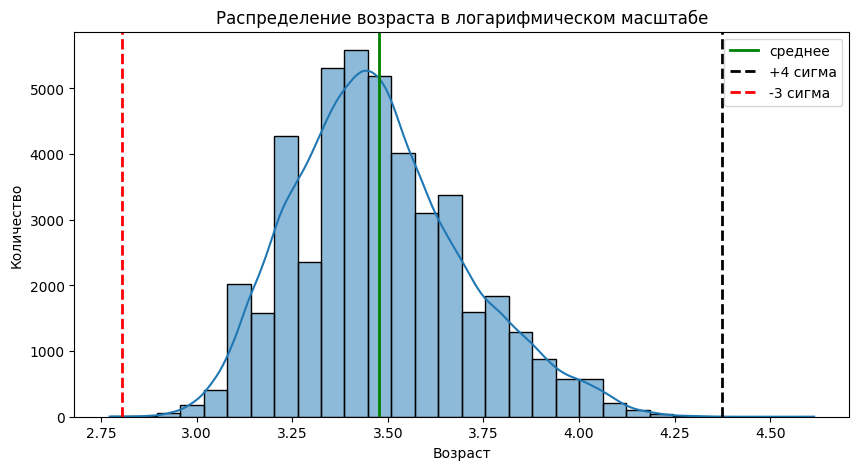

In [52]:
fig, axes = plt.subplots(figsize=(10, 5))
#sns.lineplot(x=(0, 100), y=(0, 100))
log_df = np.log(df['Возраст']+1)
histplot= sns.histplot(
    log_df, 
    bins=30,
    kde=True
)
histplot.axvline(log_df.mean(), color='g', lw=2, label=f'среднее')
histplot.axvline(log_df.mean()+ 4 * log_df.std(),  color='k', ls='--', lw=2, label=f'+4 сигма')
histplot.axvline(log_df.mean()- 3 * log_df.std(), color='r', ls='--', lw=2, label=f'-3 сигма')
histplot.legend();
histplot.set_title('Распределение возраста в логарифмическом масштабе', );
histplot.set_ylabel('Количество', );

In [53]:
outliers

Ищет работу на должность: Последнее/нынешнее место работы  \
31137  Менеджер по работе с клиентами           ООО "ФёрстКэшКомпани"   
32950                 Тестировщик игр                        OOO ЖМЫХ   
33654            Frontend-разработчик                       Freelance   

         Последняя/нынешняя должность Обновление резюме        Авто  \
31137  Менеджер по работе с клиентами  06.04.2019 09:13  Не указано   
32950                  Тестировщик ПО  09.04.2019 16:02  Не указано   
33654            Frontend-разработчик  19.04.2019 23:27  Не указано   

               Образование Пол  Возраст  Опыт работы (месяц)            Город  \
31137              среднее   М       15                  2.0  Санкт-Петербург   
32950  среднее специальное   М       15                  3.0           другие   
33654  среднее специальное   М      100                 30.0  Санкт-Петербург   

       ...  полная занятость  частичная занятость  проектная работа  \
31137  ...             False                 True             False   
32950  ...              True                False             False   
33654  ...              True                 True              True   

       стажировка  сменный график  полный день  вахтовый метод  \
31137       False            True        False           False   
32950       False           False         True           False   
33654        True           False         True           False   

       удаленная работа  гибкий график  ЗП (руб)  
31137              True           True   10000.0  
32950             False          False    2000.0  
33654              True           True   60000.0  

[3 rows x 23 columns]

В число выбросов попали соискатели с возрастом 15 и 100 лет